**Perceptron para classificação de uma porta lógica AND**

Este notebook implementa o treinamento de um Perceptron, um modelo de aprendizado de máquina supervisionado utilizado para classificação binária. O Perceptron é um tipo de rede neural artificial que utiliza uma função de ativação linear para separar os dados em duas classes.

1. **Importação de Bibliotecas**: Utilizamos bibliotecas como `numpy` para manipulação de arrays e `matplotlib` para visualização de dados.
2. **Definição dos Dados**: Os dados de entrada (`X`) e saída (`y`) representam um problema lógico de classificação.
3. **Inicialização de Parâmetros**: Pesos (`w`) e bias (`b`) são inicializados aleatoriamente, e parâmetros como taxa de aprendizado e número de iterações são definidos.
4. **Treinamento do Perceptron**:
    - O modelo ajusta os pesos e o bias com base no erro entre a saída prevista e a saída esperada.
    - O erro quadrático médio (MSE) é calculado a cada época para monitorar o desempenho.
5. **Visualização dos Resultados**:
    - Gráficos são gerados para mostrar a evolução do MSE, dos pesos e do bias ao longo das épocas.
    - A reta de separação final é plotada junto com os dados de entrada para ilustrar a classificação.

O objetivo deste notebook é demonstrar o funcionamento do algoritmo Perceptron, desde a inicialização até a convergência, e visualizar como ele aprende a separar os dados em duas classes. Este exemplo utiliza um conjunto de dados simples para facilitar o entendimento do processo de aprendizado.

**1. Importando as bibliotecas numpy, para manipulação de matrizes e a matplotlib para visualização de dados**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**2. Definindo os valores de X, dados de entrada**
**& os valores de y, dados de saída**

In [2]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1]) 

**3. Inicializando pesos e bias de forma aleatória**

In [3]:
w = np.random.rand(2)
b = np.random.rand()

**4. Taxa de aprendizado e número de iterações**

In [4]:
taxa_aprendizado = 0.1
qtd_it = 50

**5. Inicializando matrizes para armazenar MSE, pesos e bias**

In [5]:
mse_por_epoca = np.zeros(qtd_it)
pesos_por_epoca = np.zeros((qtd_it, X.shape[1]))
bias_por_epoca = np.zeros(qtd_it)

**6. Salvando histórico de pesos e bias para retas durante o treinamento**

In [6]:
historico_w = []
historico_b = []

**7. Definindo a função de ativação (limiar)**

In [7]:
def func_ativacao(sum_pesos_bias):
    if sum_pesos_bias >= 0:
        return 1
    else: 
        return 0


**8. Treinamento do Perceptron:**

1. **Laço de Treinamento**:
    - Um loop é executado por um número fixo de épocas (`qtd_it`), representando as iterações de treinamento.

2. **Cálculo da Soma Ponderada**:
    - Para cada amostra de entrada `X[i]`, calcula-se a soma ponderada dos pesos `w` e do bias `b`.

3. **Função de Ativação**:
    - A soma ponderada é passada pela função de ativação (`func_ativacao`), que retorna 1 ou 0, dependendo do limiar.

4. **Cálculo do Erro**:
    - O erro é calculado como a diferença entre o valor esperado (`y[i]`) e a saída prevista.

5. **Atualização de Pesos e Bias**:
    - Os pesos `w` e o bias `b` são ajustados com base no erro, utilizando a taxa de aprendizado (`taxa_aprendizado`).

6. **Erro Quadrático Total**:
    - O erro quadrático total é acumulado para calcular o erro médio quadrático (MSE) ao final de cada época.

7. **Armazenamento de Dados**:
    - Os valores de MSE, pesos e bias são armazenados em arrays para análise posterior.
    - O histórico de pesos e bias é salvo para visualização das retas durante o treinamento.

8. **Convergência**:
    - O loop pode ser interrompido antes do número máximo de épocas se todas as saídas previstas coincidirem com os valores esperados (`y`).

Este processo ajusta iterativamente os pesos e o bias para minimizar o erro e permitir que o Perceptron classifique corretamente os dados de entrada.

In [8]:
# Treinamento da Perceptron
for epoca in range(qtd_it):
    erro_quadrado_total = 0
    for i in range(X.shape[0]):
        # Soma ponderada + bias
        sum_pesos_bias = np.dot(w, X[i]) + b

        # Função de ativação (limiar)
        saida = func_ativacao(sum_pesos_bias)

        # Calculando o erro
        erro = y[i] - saida

        # Atualizando pesos e bias
        w += taxa_aprendizado * erro * X[i]
        b += taxa_aprendizado * erro

        # Acumulando o erro quadrático
        erro_quadrado_total += erro**2

    # Calculando MSE
    mse = erro_quadrado_total / X.shape[0]

    # Armazenando os valores da época
    mse_por_epoca[epoca] = mse*100
    pesos_por_epoca[epoca] = w
    bias_por_epoca[epoca] = b

    # Guardando histórico para plot
    historico_w.append(w.copy())
    historico_b.append(b)

    # Verificando se todas as saídas estão corretas
    predicoes = np.array([1 if np.dot(w, xi) + b >= 0 else 0 for xi in X])
    if np.array_equal(predicoes, y):
        break

**9. Plotagem da distribuição dos pontos juntamente com a reta de separação gerada pela perceptron**

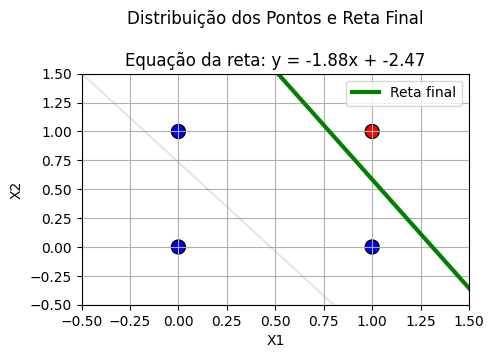

In [9]:
# === Gráfico separado da reta de separação final ===
plt.figure(figsize=(5, 3))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k', s=100)

# Retas durante o treinamento
for w_hist, b_hist in zip(historico_w, historico_b):
    x1 = np.linspace(-0.5, 1.5, 100)  # limites fixos já aqui
    if w_hist[1] != 0:
        x2 = -(w_hist[0] * x1 + b_hist) / w_hist[1]
        plt.plot(x1, x2, 'gray', alpha=0.2)

# Reta final destacada
x1 = np.linspace(-0.5, 1.5, 100)
if w[1] != 0:
    x2 = -(w[0] * x1 + b) / w[1]
    plt.plot(x1, x2, 'g-', linewidth=3, label='Reta final')
    a = round(-w[0]/w[1],2)
    c = round(b/w[1],2)
    #print(f"\n\nEquação da reta: y = {a}x + {c}")

# Ajustes de layout
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.title(f'Distribuição dos Pontos e Reta Final\n\nEquação da reta: y = {a}x + {c}')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True)
plt.show()

**10. Plotagem dos gráficos de:**
- `MSE` por época
- `Pesos` por época

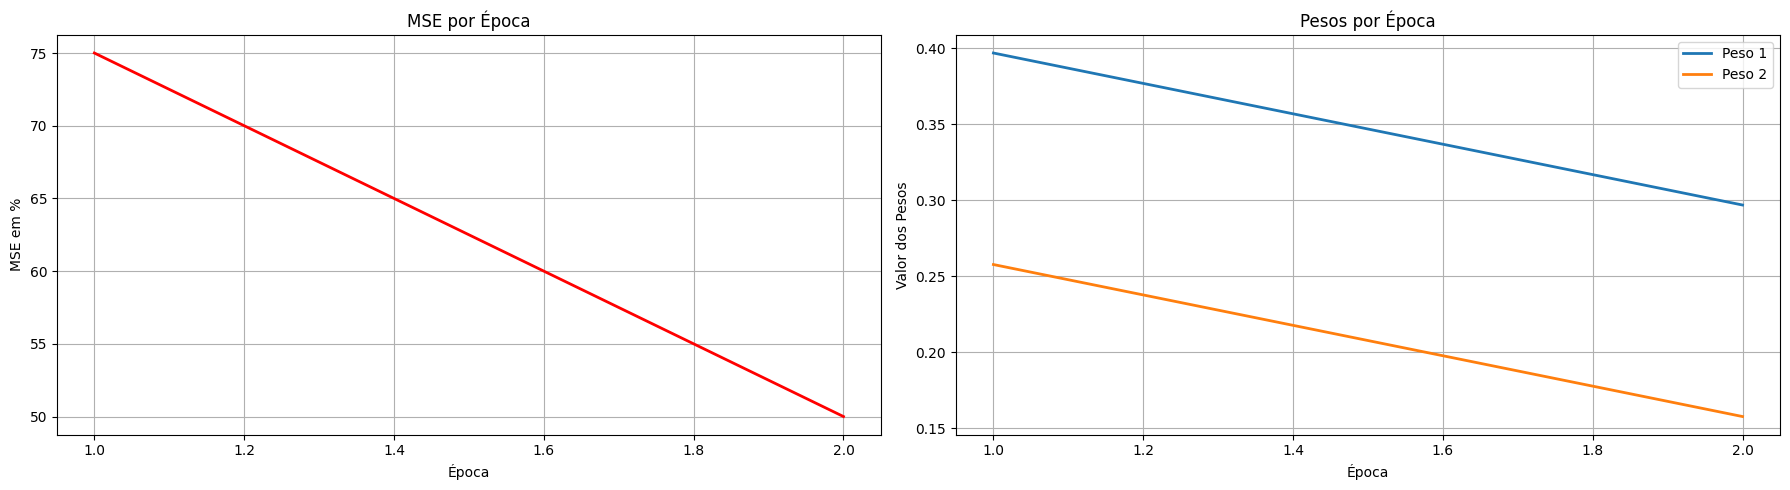

In [10]:
# === Subplots para MSE, pesos e bias ===
fig, axs = plt.subplots(1, 2, figsize=(18, 5))

# MSE por época
axs[0].plot(range(1, epoca + 2), mse_por_epoca[:epoca + 1], 'r-', linewidth=2)
axs[0].set_title('MSE por Época')
axs[0].set_xlabel('Época')
axs[0].set_ylabel('MSE em %')
axs[0].grid(True)

# Pesos por época
axs[1].plot(range(1, epoca + 2), pesos_por_epoca[:epoca + 1, 0], label='Peso 1', linewidth=2)
axs[1].plot(range(1, epoca + 2), pesos_por_epoca[:epoca + 1, 1], label='Peso 2', linewidth=2)
axs[1].set_title('Pesos por Época')
axs[1].set_xlabel('Época')
axs[1].set_ylabel('Valor dos Pesos')
axs[1].legend()
axs[1].grid(True)

# Layout final
plt.tight_layout()
plt.show()

In [ ]:
!jupyter nbconvert --to html notebook_perceptron_porta_AND.ipynb.ipynb


SyntaxError: invalid syntax (609226700.py, line 1)